---
                                            Московский Авиационный Институт  
                                      (Национальный Исследовательский Университет)  
        
                
                
    Кафедра 806 «Вычислительная математика и программирование»  
    Институт: «Информационные технологии и прикладная математика»  
    Дисциплина: «Разработка ПО для высокопроизводительных систем»        
                


                                            --------------------------------
                                            Лабораторная работа по Pandas №3  
                                            --------------------------------    
                                            
                                            
                                            
                                                                                Группа: М8О-103М-20  
                                                                                Студент: Ларин Антон Владимирович  
                                                                                Преподаватель: Поповкин Александр Викторович  
                                                                                
                                                                                
                                                                                
                                                     Москва, 2020  
                                                         
---

Импорт библиотек

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Найти евклидово расстояние между двумя объектами Series

In [23]:
s1 = pd.Series(np.random.randint(1, 5, 5))
s2 = pd.Series(np.random.randint(1, 5, 5))
eucDistance = np.linalg.norm(s1 - s2)
print(s1)
print(s2)
print(eucDistance)

0    4
1    2
2    1
3    4
4    3
dtype: int32
0    1
1    3
2    4
3    2
4    4
dtype: int32
4.898979485566356


Найти индексы локальных максимумов в объекте Series

[6 3 6 0 6 8 0 4 1 0]


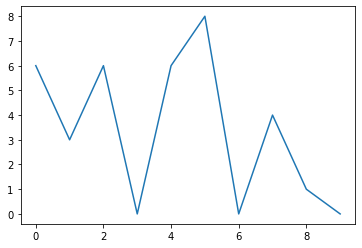

[ 2 -2  2  0 -2  2 -2  0]
[2 5 7]


In [108]:
s = pd.Series(np.random.randint(0, 10, 10))
print(s.values)
plt.plot(s.index, s.values)
plt.show()
extr = np.diff(np.sign(np.diff(s)))
print(extr)
indexes = np.where(extr == -2)[0] + 1
print(indexes)

Заменить пробелы наименее часто встречающимся символом

In [50]:
testString = 'от топота копыт пыль по полю летит'
s = pd.Series(list(testString))

symbolsFreq = s.value_counts()
print(symbolsFreq)
testString = ''.join(s.replace(' ', symbolsFreq.index[-1]))
print(testString)

о    6
     6
т    6
п    5
л    3
ы    2
а    1
е    1
ю    1
и    1
ь    1
к    1
dtype: int64
отктопотаккопыткпылькпокполюклетит


Создать объект Series, который содержит в индексах даты выходных дней субботы, а в значениях случайные числа от 1 до 10

In [14]:
s = pd.Series(np.random.randint(1, 10, 15), pd.date_range('2020-09-01', periods = 15, freq = 'W-SAT'))
s

2020-09-05    1
2020-09-12    6
2020-09-19    8
2020-09-26    5
2020-10-03    1
2020-10-10    5
2020-10-17    6
2020-10-24    9
2020-10-31    2
2020-11-07    1
2020-11-14    3
2020-11-21    6
2020-11-28    6
2020-12-05    9
2020-12-12    1
Freq: W-SAT, dtype: int32

Заполнить пропущенные даты значением выше (заполненной даты)

In [84]:
filledDates = pd.Series([1, 2, 3], index = pd.to_datetime(['2020-09-01', '2020-09-05', '2020-09-09']))
print(filledDates)
allDates = filledDates.resample('D').ffill()
print(allDates)

2020-09-01    1
2020-09-05    2
2020-09-09    3
dtype: int64
2020-09-01    1
2020-09-02    1
2020-09-03    1
2020-09-04    1
2020-09-05    2
2020-09-06    2
2020-09-07    2
2020-09-08    2
2020-09-09    3
Freq: D, dtype: int64


Вычислить автокорреляцию объекта Series

In [166]:
n = 16
 
s = pd.Series(np.random.randint(0, 8, n))
print(s)

autocorr = [s.autocorr(lag = i) for i in range(n // 4)]
print(autocorr)

0     4
1     2
2     7
3     6
4     2
5     5
6     4
7     2
8     3
9     6
10    2
11    4
12    4
13    2
14    0
15    6
dtype: int32
[1.0, -0.22646007257119813, -0.36448230574558627, 0.451376310962561]
